<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/MyLinear_momentum_rmse_prop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np

In [0]:
from torch.nn.parameter import Parameter

In [0]:
from fastai.basics import *

In [0]:
cuda0 = torch.device('cuda:0')

In [0]:
cuda0

device(type='cuda', index=0)

In [0]:
lin = nn.Linear(100,10).cuda()

In [0]:
params = [i for i in lin.parameters()]
params

In [0]:
!pip install ipdb

  Created wheel for ipdb: filename=ipdb-0.13.2-cp36-none-any.whl size=10522 sha256=bdd4cb98571abcb795ab80048ff05086cffc2e3eae7090c2876290e37f5be37f
  Stored in directory: /root/.cache/pip/wheels/60/c2/15/793365e3c9318c46ba914263740d90f1fe67f544b979141ce4
Successfully built ipdb


In [0]:
from ipdb import set_trace as st

In [0]:
x = torch.randn(2, 2, requires_grad = True)

# From numpy
x = np.array([1., 2., 3.]) #Only Tensors of floating point dtype can require gradients
x = torch.from_numpy(x)
# Now enable gradient 
x.requires_grad_(True)
# _ above makes the change in-place (its a common pytorch thing)

tensor([1., 2., 3.], dtype=torch.float64, requires_grad=True)

In [0]:
x.data.zero_()

tensor([0., 0., 0.], dtype=torch.float64)

In [0]:
x

tensor([0., 0., 0.], dtype=torch.float64, requires_grad=True)

In [0]:
x = torch.randn(2, 2, requires_grad= True)

In [0]:
x = np.array([1., 2., 3.])

In [0]:
x

array([1., 2., 3.])

In [0]:
x_1 = map(torch.tensor, (x))

In [0]:
x = torch.from_numpy(x)

In [0]:
x

tensor([1., 2., 3.], dtype=torch.float64)

In [0]:
x.requires_grad = True
x

tensor([1., 2., 3.], dtype=torch.float64, requires_grad=True)

In [0]:
x.requires_grad_(True)
x

tensor([1., 2., 3.], dtype=torch.float64, requires_grad=True)

In [0]:
import torch

# Creating the graph
x = torch.tensor(1.0, requires_grad = True)
y = torch.tensor(2.0)
z = x * y

# Displaying
for i, name in zip([x, y, z], "xyz"):
    print(f"{name}\ndata: {i.data}\nrequires_grad: {i.requires_grad}\n\grad: {i.grad}\ngrad_fn: {i.grad_fn}\nis_leaf: {i.is_leaf}\n")

x
data: 1.0
requires_grad: True
\grad: None
grad_fn: None
is_leaf: True

y
data: 2.0
requires_grad: False
\grad: None
grad_fn: None
is_leaf: True

z
data: 2.0
requires_grad: True
\grad: None
grad_fn: <MulBackward0 object at 0x7feafd6de978>
is_leaf: False



In [0]:
!wget http://deeplearning.net/data/mnist/mnist.pkl.gz

--2020-04-28 15:48:55--  http://deeplearning.net/data/mnist/mnist.pkl.gz
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16168813 (15M) [application/x-gzip]
Saving to: ‘mnist.pkl.gz’

mnist.pkl.gz        100%[===================>]  15.42M  4.10MB/s    in 4.1s    

2020-04-28 15:49:00 (3.74 MB/s) - ‘mnist.pkl.gz’ saved [16168813/16168813]



In [0]:
!pwd

/content


In [0]:
path = Path('/content')

In [0]:
path.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/mnist.pkl.gz'),
 PosixPath('/content/sample_data')]

In [0]:
with gzip.open(path/'mnist.pkl.gz', 'rb') as f:
  (x_train, y_train), (x_valid, y_valid), _ = pickle.load(f, encoding = 'latin-1')

In [0]:
x_train, y_train

(array([[0., 0., 0., 0., ..., 0., 0., 0., 0.],
        [0., 0., 0., 0., ..., 0., 0., 0., 0.],
        [0., 0., 0., 0., ..., 0., 0., 0., 0.],
        [0., 0., 0., 0., ..., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., ..., 0., 0., 0., 0.],
        [0., 0., 0., 0., ..., 0., 0., 0., 0.],
        [0., 0., 0., 0., ..., 0., 0., 0., 0.],
        [0., 0., 0., 0., ..., 0., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, 1, ..., 0, 8, 4, 8]))

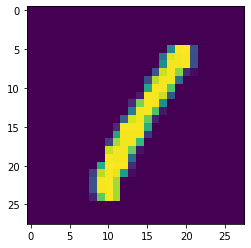

In [0]:
plt.imshow(x_train[3].reshape((28,28)))

In [0]:
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

In [0]:
x_train.shape

torch.Size([50000, 784])

In [0]:
test = torch.rand(5, 5)
test_2 = torch.rand(5, 5)

In [0]:
test.cuda()

tensor([[0.3013, 0.3417, 0.4416, 0.4393, 0.8587],
        [0.4555, 0.4339, 0.4446, 0.3584, 0.0542],
        [0.4183, 0.5120, 0.9956, 0.7079, 0.4810],
        [0.1974, 0.9558, 0.7099, 0.8816, 0.8581],
        [0.5408, 0.6494, 0.4579, 0.9321, 0.6539]], device='cuda:0')

In [0]:
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)

In [0]:
bs = 64
data= DataBunch.create(train_ds, valid_ds, bs)

In [0]:
data

DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7f62fe682f28>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7f62feac82e8>;

Test: 64

In [0]:
x, y = next(iter(data.train_dl))

In [0]:
loss_function = nn.CrossEntropyLoss()

In [0]:
a = torch.Tensor()

In [0]:
a.add(torch.tensor(2))

tensor([])

In [0]:
class Linear(nn.Module):
  def __init__(self, in_features, out_features, with_bias = False):
    super().__init__()
    self.with_bias = with_bias
    self.in_features = in_features
    self.out_features = out_features

    # self.weights = Parameter(torch.rand(out_features, in_features, requires_grad= True))
    # self.bias = Parameter(torch.rand(out_features, requires_grad= True))

    self.weights = torch.rand(out_features, in_features, requires_grad= True, device=cuda0)
    self.bias = torch.rand(out_features, requires_grad= True, device=cuda0)

    self.weight_moms = torch.tensor(1.)
    self.bias_moms = torch.tensor(1.)

    self.weight_rms_prop = torch.tensor(1.)
    self.bias_rms_prop = torch.tensor(1.)

    self.parameter = []

    self.bound_parameters()
    self.register_parameters()

  def forward(self, xb):
    activation = xb @ torch.transpose(self.weights, 0, 1)
    if self.with_bias:
      for act in activation:
        act.add_(self.bias)
    return activation

  def bound_parameters(self):
    stdv = 1./math.sqrt(self.weights.shape[1])
    self.weights.data.uniform_(-stdv, stdv)
    if self.with_bias:
      self.bias.data.uniform_(-stdv, stdv)
  
  def register_parameters(self):
    self.parameter.append(self.weights)
    if self.with_bias:
      self.parameter.append(self.bias)
  
  def parameters(self):
    for param in self.parameter:
      yield param
  
  def reset_grads(self):
    for param in self.parameters():
      if max(param.grad) != 0.0:
        param.grad.zero_()

In [0]:
doc(Parameter)

In [0]:
lin = Linear(784, 10, True).cuda()

In [0]:
M = torch.Tensor([[[1, 2, 3], [4, 5, 6]],[[10, 20, 30], [40, 50, 60]]])

In [0]:
pars = [i for i in lin.parameters()]

In [0]:
pars[0].data

tensor([[ 0.0107,  0.0092,  0.0009,  ..., -0.0297, -0.0204, -0.0270],
        [ 0.0064, -0.0050,  0.0088,  ..., -0.0305,  0.0215,  0.0156],
        [ 0.0108, -0.0119,  0.0173,  ...,  0.0307, -0.0356,  0.0345],
        ...,
        [-0.0102,  0.0233,  0.0196,  ...,  0.0310, -0.0246, -0.0247],
        [-0.0187, -0.0348,  0.0012,  ...,  0.0120,  0.0212, -0.0295],
        [-0.0239,  0.0345, -0.0344,  ..., -0.0131, -0.0155,  0.0321]],
       device='cuda:0')

In [0]:
pars

[tensor([[-0.0264,  0.0137, -0.0016,  ...,  0.0341, -0.0104,  0.0065],
         [-0.0155,  0.0250, -0.0266,  ...,  0.0053, -0.0161,  0.0072],
         [-0.0306,  0.0098,  0.0130,  ...,  0.0072,  0.0041,  0.0017],
         ...,
         [ 0.0041,  0.0171,  0.0141,  ..., -0.0057, -0.0094, -0.0209],
         [ 0.0350,  0.0068,  0.0021,  ...,  0.0134,  0.0044,  0.0167],
         [ 0.0179, -0.0310,  0.0184,  ...,  0.0088, -0.0262,  0.0065]],
        device='cuda:0', requires_grad=True),
 tensor([-0.0122, -0.0335,  0.0259,  0.0139, -0.0238, -0.0329,  0.0074, -0.0190,
         -0.0312,  0.0244], device='cuda:0', requires_grad=True)]

In [0]:
pars[0].data

tensor([[ 0.0122,  0.0022,  0.0085,  ..., -0.0201,  0.0119, -0.0316],
        [-0.0315, -0.0305,  0.0047,  ..., -0.0260, -0.0010, -0.0139],
        [ 0.0327,  0.0236, -0.0287,  ..., -0.0084, -0.0013,  0.0273],
        ...,
        [-0.0323,  0.0232,  0.0221,  ..., -0.0007,  0.0196,  0.0195],
        [-0.0149, -0.0237,  0.0199,  ...,  0.0210,  0.0025,  0.0182],
        [ 0.0258,  0.0062, -0.0214,  ...,  0.0159,  0.0217,  0.0303]],
       device='cuda:0')

In [0]:
new_lin = nn.Linear(784, 10, True).cuda()

In [0]:
# new_yhat = new_lin(x)
y_hat = lin(x)

In [0]:
y_hat

In [0]:
# n_loss = loss_function(new_yhat, y)
loss = loss_function(y_hat, y)

In [0]:
loss

tensor(2.3616, device='cuda:0', grad_fn=<NllLossBackward>)

In [0]:
# n_loss.backward()
loss.backward()

In [0]:
params = [i for i in lin.parameters()]

In [0]:
lin.weights.grad.shape, lin.weights.shape

(torch.Size([10, 784]), torch.Size([10, 784]))

In [0]:
lin.weights.grad.data.max(), lin.weights.grad.data.min()

(tensor(0.0764, device='cuda:0'), tensor(-0.0938, device='cuda:0'))

In [0]:
wd = 1e-05
w2 = 

In [0]:
lr = 1e-02
with torch.no_grad():
  lin.weights.sub_(lr*lin.weights.grad)
  lin.bias.sub_(lr*lin.bias.grad)
  lin.weights.grad.zero_()
  lin.bias.grad.zero_()

In [0]:
a = torch.tensor([2., 3.])

In [0]:
def test_a():
  for i in a:
    yield i

test_a()

<generator object test_a at 0x7f46ba667888>

In [0]:
for i in test_a():
  print(i)

tensor(2.)
tensor(3.)


In [0]:
a = []
for i in range(4):
    a.append(torch.rand(1, 2))

b = torch.Tensor(3, 4)
c = torch.cat(a, out=b)

In [0]:
a = torch.tensor([1., 2.])
b = torch.tensor([3., 4., 5.])
c = torch.cat(a, b))

In [0]:
c

tensor([1., 2., 3., 4., 5.])

In [0]:
a = torch.tensor([[8., 16.],[4., 2.]])
torch.sqrt(a)
a

tensor([[2.8284, 4.0000],
        [2.0000, 1.4142]])

In [0]:
a = torch.tensor([[8., 16.],[4., 2.]])
b = torch.tensor([[2.,2.], [2., 2.]])
a = a + 0.0001
a[0][0] > 8

tensor(True)

In [0]:
class MnistLinear(nn.Module):
  def __init__(self, in_features, out_features, with_bias):
    suoer().__init__()
    self.lin = Linear(in_features, out_features, with_bias)
  
  def forward(self, xb):
    return self.lin(xb)

In [0]:
nd = [i for i in model.parameters()]

[]

In [0]:
w2 = 0
for i in model.lin.parameters():
  w2 += i.sum()


tensor(-0.3595, device='cuda:0', grad_fn=<AddBackward0>)

In [0]:
lin_w, lin_b, lin_1_w, lin_1_b = -20, -20, -20, -20

In [0]:
c == 0 and type(model.lin.weight_moms) != int

True

In [0]:
wd = 0
lr = 1e-02

def update(x, y, lr):
  # print('epoch')
  
  y_hat = model(x)
  w2 = 0
  for i in model.lin.parameters(): 
    w2 += i.sum()
  loss = loss_function(y_hat, y) + (w2**2)*wd
  loss.backward()
  with torch.no_grad():
    c = 0

    for param in model.lin.parameters():
      
      if param.shape == model.lin.weight_moms.shape:
        mom_grad = 0.1*param.grad
        mom_grad.add_(0.9*model.lin.weight_moms)
        param.sub_(7e-02*mom_grad)
        model.lin.weight_moms = mom_grad
      
      elif param.shape == model.lin.bias_moms.shape:
        mom_grad = 0.1*param.grad
        mom_grad.add_(0.9*model.lin.bias_moms)
        param.sub_(7e-02*mom_grad)
        model.lin.bias_moms = mom_grad

      else:
        param.sub_(7e-02*param.grad)
        if c == 0:
          model.lin.weight_moms = 7e-02*param.grad
        elif c == 1:
          model.lin.bias_moms = 7e-02*param.grad
      
      c += 1
      param.grad.zero_()

    c = 0
    for param_1 in model.lin_1.parameters():

      if param_1.shape == model.lin_1.weight_moms.shape:
        mom_grad = 0.1*param_1.grad
        mom_grad.add_(0.9*model.lin_1.weight_moms)
        param_1.sub_(7e-02*mom_grad)
        model.lin_1.weight_moms = mom_grad
      
      elif param_1.shape == model.lin.bias_moms.shape:
        mom_grad = 0.1*param_1.grad
        mom_grad.add_(0.9*model.lin_1.bias_moms)
        param_1.sub_(7e-02*mom_grad)
        model.lin_1.bias_moms = mom_grad
        
      else:
        param_1.sub_(7e-02*param_1.grad)
        if c == 0:
          model.lin_1.weight_moms = 7e-02*param.grad
        elif c == 1:
          model.lin_1.bias_moms = 7e-02*param.grad
          moms_set_1 = True

      param_1.grad.zero_()
      c += 1
  
  return loss.item()

In [0]:
class MnistNN(nn.Module):
  def __init__(self, in_features, out_features, with_bias):
    super().__init__()
    self.lin = Linear(in_features, 50, with_bias)
    self.lin_1 = Linear(50, out_features, with_bias)
  
  def forward(self, xb):
    act = F.relu(self.lin(xb))
    return self.lin_1(act)
  
  def upgrade_moms(self, x, y, lr):

    y_hat = self(x)
    w2 = 0
    for i in self.lin.parameters(): 
      w2 += i.sum()
    loss = loss_function(y_hat, y) + (w2**2)*wd
    loss.backward()
    with torch.no_grad():
      c = 0

      for param in self.lin.parameters():
        
        if param.shape == self.lin.weight_moms.shape:
          mom_grad = 0.1*param.grad
          mom_grad.add_(0.9*self.lin.weight_moms)
          param.sub_(7e-02*mom_grad)
          self.lin.weight_moms = mom_grad
        
        elif param.shape == self.lin.bias_moms.shape:
          mom_grad = 0.1*param.grad
          mom_grad.add_(0.9*self.lin.bias_moms)
          param.sub_(7e-02*mom_grad)
          self.lin.bias_moms = mom_grad

        else:
          param.sub_(7e-02*param.grad)
          if c == 0:
            self.lin.weight_moms = 7e-02*param.grad
          elif c == 1:
            self.lin.bias_moms = 7e-02*param.grad
        
        c += 1
        param.grad.zero_()

      c = 0
      for param_1 in self.lin_1.parameters():

        if param_1.shape == self.lin_1.weight_moms.shape:
          mom_grad = 0.1*param_1.grad
          mom_grad.add_(0.9*self.lin_1.weight_moms)
          param_1.sub_(7e-02*mom_grad)
          self.lin_1.weight_moms = mom_grad
        
        elif param_1.shape == self.lin.bias_moms.shape:
          mom_grad = 0.1*param_1.grad
          mom_grad.add_(0.9*self.lin_1.bias_moms)
          param_1.sub_(7e-02*mom_grad)
          self.lin_1.bias_moms = mom_grad
          
        else:
          param_1.sub_(7e-02*param_1.grad)
          if c == 0:
            self.lin_1.weight_moms = 7e-02*param.grad
          elif c == 1:
            self.lin_1.bias_moms = 7e-02*param.grad

        param_1.grad.zero_()
        c += 1
    
    return loss.item()
  
  def upgrade_rmse_prop(self, x, y, lr):

    y_hat = self(x)

    # w2 = 0
    # for param in self.lin.parameters(): w2 += param.sum()

    loss = loss_function(y_hat, y) #+ wd * (w2**2)
    loss.backward()

    with torch.no_grad():
      c = 0
      st()
      for param in self.lin.parameters():
        
        if param.shape == self.lin.weight_rms_prop.shape:
          rms_grad = 0.1*param.grad**2
          rms_grad.add_(0.9*self.lin.weight_rms_prop)

          update = lr * param.grad/((rms_grad) + 1e-10) ** 2

          param.sub_(update)
          self.lin.weight_rms_prop = rms_grad
        
        elif param.shape == self.lin.bias_rms_prop.shape:
          rms_grad = 0.1*param.grad**2
          rms_grad.add_(0.9*self.lin.bias_rms_prop)

          update = lr * param.grad/((rms_grad) + 1e-10) ** 2

          param.sub_(update)
          self.lin.bias_rms_prop = rms_grad

        else:
          param.sub_(lr*param.grad)
          if c == 0:
            self.lin.weight_rms_prop = 0.1*param.grad **2
          elif c == 1:
            self.lin.bias_rms_prop = 0.1*param.grad ** 2
        
        c += 1
        param.grad.zero_()

      c = 0
      for param_1 in self.lin_1.parameters():

        if param_1.shape == self.lin_1.weight_rms_prop.shape:
          rms_grad = 0.1*param_1.grad ** 2
          rms_grad.add_(0.9*self.lin_1.weight_rms_prop)

          update = lr * param_1.grad/((rms_grad) + 1e-10) **2

          param_1.sub_(update)
          self.lin_1.weight_rms_prop = rms_grad
        
        elif param_1.shape == self.lin.bias_moms.shape:
          rms_grad = 0.1*param_1.grad ** 2
          rms_grad.add_(0.9*self.lin_1.bias_rms_prop)

          update = lr * param.grad/((rms_grad) + 1e-10) **2

          param_1.sub_(update)
          self.lin_1.bias_rms_prop = rms_grad
          
        else:
          param_1.sub_(lr*param_1.grad)
          if c == 0:
            self.lin_1.weight_rms_prop = 0.1*param_1.grad **2
          elif c == 1:
            self.lin_1.bias_rms_prop = 0.1*param_1.grad **2

        param_1.grad.zero_()
        c += 1
    
    return loss.item()


In [0]:
model = MnistNN(784, 10, True).cuda()
lr = 7e-02
wd = 1e-05
model.upgrade_rmse_prop(x, y, lr)
# update(x, y, lr)

2.2926740646362305

In [0]:
print(model.lin.weight_rms_prop.shape, model.lin.bias_rms_prop.shape, model.lin_1.weight_rms_prop.shape, model.lin_1.bias_rms_prop.shape)
print(model.lin.weights.shape, model.lin.bias.shape, model.lin_1.weights.shape, model.lin_1.bias.shape)

torch.Size([50, 784]) torch.Size([50]) torch.Size([10, 50]) torch.Size([10])
torch.Size([50, 784]) torch.Size([50]) torch.Size([10, 50]) torch.Size([10])


True

In [0]:
update(x, y, lr)

In [0]:
data.train_ds.tensors[0].shape

torch.Size([50000, 784])

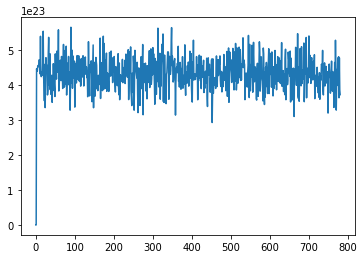

In [0]:
model = MnistNN(784, 10, True).cuda()
lr = 1e-03
wd = 1e-05
losses = [model.upgrade_rmse_prop(x, y, lr) for x, y in data.train_dl]
plt.plot(losses)

In [0]:
model.lin.weight_moms

-20

In [0]:
acts = model(x)

In [0]:
preds = []
for i in acts:
  max_prob = i.max()
  preds.append(list(i).index(max_prob))

In [0]:
len(preds)

64

In [0]:
correct = 0
for i in range (0, len(preds)):
  if preds[i] == y[i]:
    correct += 1
acc = correct/len(preds)
acc

0.859375

In [0]:
preds = []
for i, k in data.valid_dl:
  act = model(i)
  for j in act:
    max_prob = j.max()
    preds.append(list(j).index(max_prob))

correct_data = valid_ds.tensors[1]
correct_preds = 0
for i in range(len(preds)):
  if preds[i] == correct_data[i]:
    correct_preds +=1

acc = correct_preds/len(preds)
acc

0.9125